**Bank Customer Churn** 


The aim of the project is to analyze whether a customer will leave the bank  using customer's demographic and financial information such as customer's age, gender, credit score , tenure and country.This data set was taken from www.kaggle.com and 10000 rows and 14 columns.


**Data Dictionary**

Column Name         Description
RowNumber	        Row number
CustomerId	        Unique identification key for different customers
Surname	            Customer's last name
CreditScore       	Credit score of the customer
Geography	        Country of the customer
Age	                Age of the customer
Tenure	            Number of years for which the customer has been with the bank
Balance	            Bank balance of the customer
NumOfProducts	    Number of bank products the customer is utilising
HasCrCard	        Binary flag for whether the customer holds a credit card with the bank or not
IsActiveMember	    Binary flag for whether the customer is an active member with the bank or not
EstimatedSalary	    Estimated salary of the customer in Dollars
Exited	            Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [ ]:
#loading the dataset
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Data processing:**

In [ ]:
#checking the shape of the dataset
df.shape
#drop unnecessary coulumns
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
#null values count
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#column data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#dulicate values
df.duplicated().sum()

0

In [ ]:
#rename column
df.rename(columns={'Exited':'Churn'}, inplace=True)

Descriptive statistics

In [ ]:
#descriptive statistics
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Data Representation**

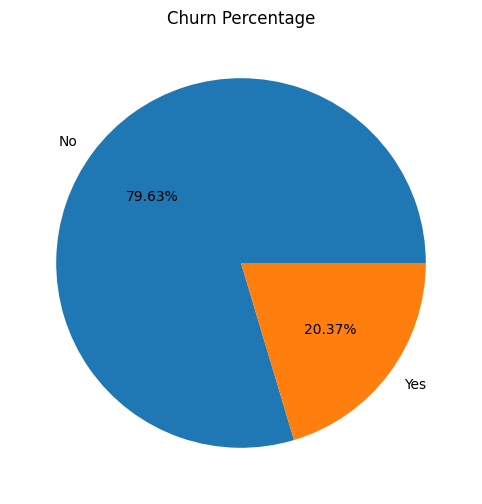

In [ ]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

The pie chart represents the customers in the bank, with 20.37% of customers likely to churn.

**Gender Distribution**

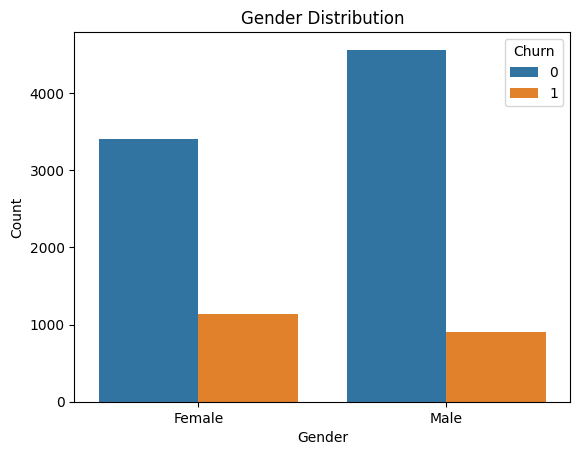

In [ ]:
#gender and customer churn
sns.countplot(x = 'Gender', data = df, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The majority of the bank customers are male. It can be seen that female tend to churn the bank more than males.

**Age Distribution**

<Axes: xlabel='Age', ylabel='Count'>

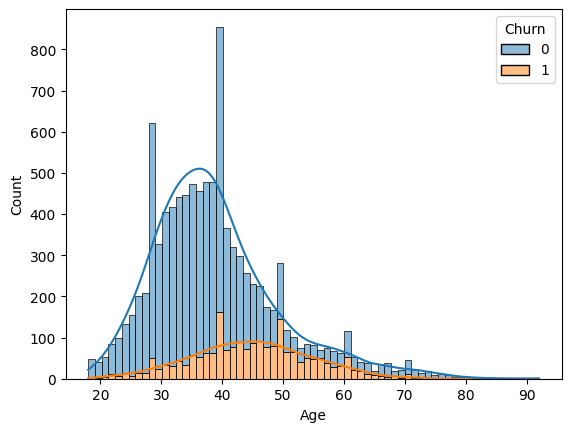

In [ ]:
#histogram for age distribution
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack",kde=True)

As seen in the plot, the majority of customers in the bank are between the ages of 30 to 40 years. Customers that tend to tend are between the ages of 40 and 50 years. This demonstrates that age plays a significant role in customer churn ,with late adult more likely to churn than young adults.

**Tenure**

In [5]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=df,ax=ax[1])

NameError: name 'plt' is not defined